In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import demoji
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joako\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Analisis de datos

In [144]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [53]:
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [54]:
df.sample(20)

tweet_text   cyberbullying_type
30188                       @dampscot yup, i'm aware. :)  other_cyberbullying
3750   @AshForSyria @TheMoeDee @RazanSpeaks Or are yo...    not_cyberbullying
16466  once after reading quran, anyone can understan...             religion
21400  Listen who ever chanted such slogans should be...             religion
15813  oh it was, from the "you should rape him!" lin...               gender
15346  I'm watching Netflix's "Comedians of the World...               gender
32645  i hate social media influencers man... it’s re...                  age
5657   #MKR always needs an evil team for ratings. Ka...    not_cyberbullying
6339   Is it just us or is #ImACelebrityAU turning in...    not_cyberbullying
44229  “@chvrchs: old twitter was when niggers were s...            ethnicity
35760  Just a reminder that defunding the police mean...                  age
12193  RT @PatriceChienne: Deconstructed lemon tart, ...               gender
43742  @Blacks4D_Wilson serious? A legitimate questio...            ethnicity
44543  Ty bby. Ur the best and you’ve encouraged me s...            ethnicity
20062  We are not like u murder of humanity. U massac...             religion
37229  Oh cool tuck shop money! But instead of chippi...                  age
13707  .@shelbylynne74 @TigerClaud Ahem... http://t.c...               gender
19814  @dawla___account @IronLionHeart Good reason no...             religion
7845              @LifeInKhilafah http://t.co/ASYCnBPvnQ    not_cyberbullying
2747   Craving some spicy pork and egg tortilla.. way...    not_cyberbullying

In [145]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [56]:
#graficar con plotly express como se distribuyen los tipos de cyberbullying y añade la cantidad de tweets por cada tipo

import plotly.express as px
cyberbullying_counts = df['cyberbullying_type'].value_counts()

# Crear un DataFrame con los tipos de cyberbullying y la cantidad de tweets por tipo
cyberbullying_data = pd.DataFrame({'Cyberbullying Type': cyberbullying_counts.index,
                                   'Count': cyberbullying_counts.values})

# Graficar con Plotly Express
fig = px.bar(cyberbullying_data, x='Cyberbullying Type', y='Count',
             title='Distribución de Tipos de Cyberbullying y Cantidad de Tweets por Tipo',
             labels={'Cyberbullying Type': 'Tipo de Cyberbullying', 'Count': 'Cantidad de Tweets'},
             color='Cyberbullying Type')  # Opcional: Agregar color por tipo de cyberbullying

fig.show()


c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



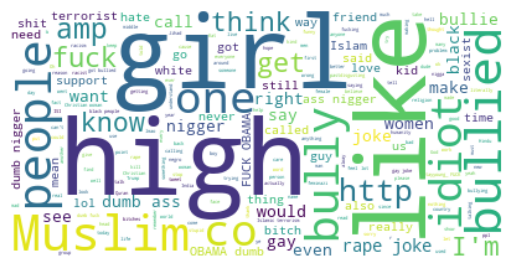

In [132]:
all_tweets = " ".join(tweet for tweet in df['tweet_text'])


wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(all_tweets)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



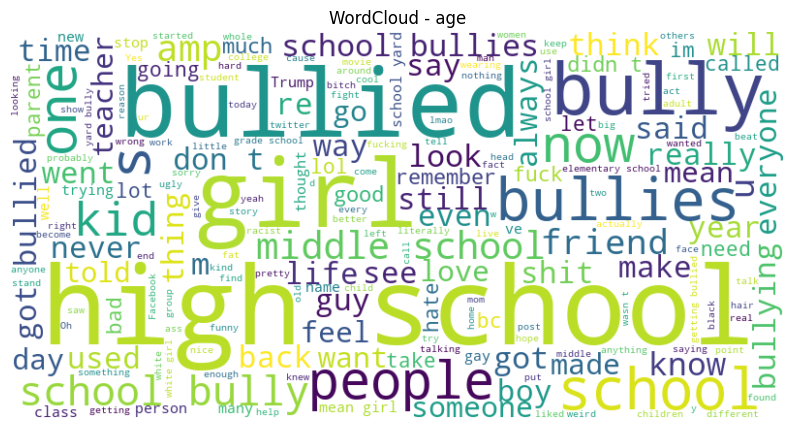

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



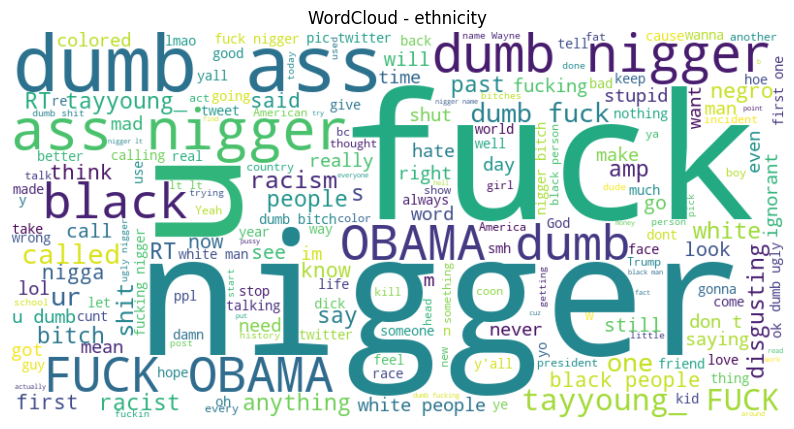

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



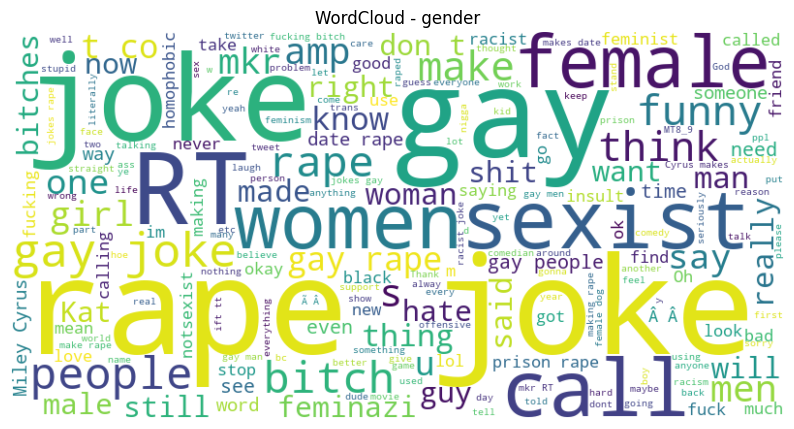

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



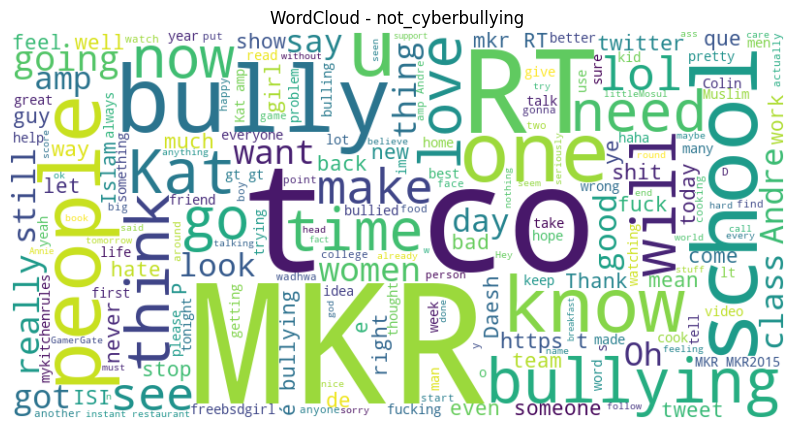

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



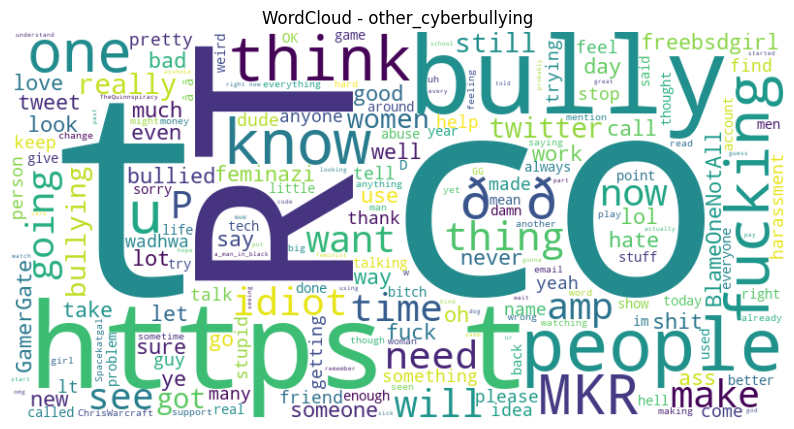

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



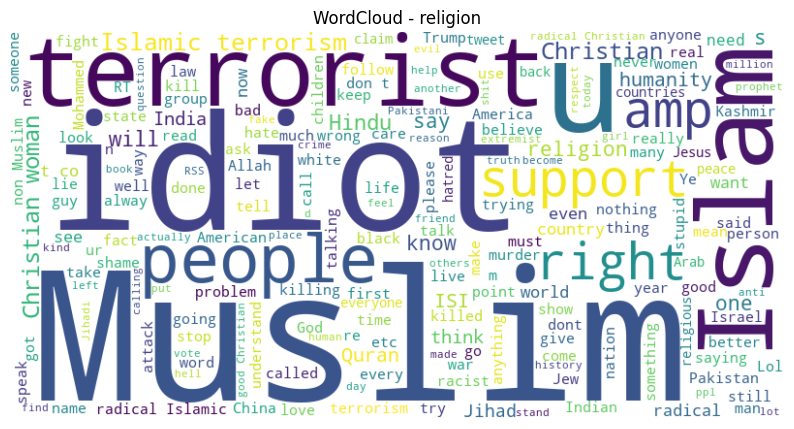

In [58]:
grouped = df.groupby('cyberbullying_type')

# Crear un WordCloud para cada tipo de cyberbullying
for cyberbullying_type, group in grouped:
    text = ' '.join(group['tweet_text'])  # Concatenar todos los tweets de un tipo específico
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Mostrar el WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud - {cyberbullying_type}')
    plt.axis('off')
    plt.show()

other_cyberbulling se eliminará ya que puede causar confusión en los modelos con otras clases de ciberbullying

In [146]:
df_other = df[df['cyberbullying_type'] == 'other_cyberbullying']
df_other.head()

tweet_text   cyberbullying_type
23916  @ikralla fyi, it looks like I was caught by it...  other_cyberbullying
23917  I need to just switch to an organization-based...  other_cyberbullying
23918  RMAed my monoprice. Shoddy power bricks on tho...  other_cyberbullying
23919               @murphy_slaw https://t.co/M8w8xnUnDL  other_cyberbullying
23920  @1Life0Continues i've got the code to interpre...  other_cyberbullying

In [147]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: count, dtype: int64

In [61]:
len(df)

39869

In [62]:
df.sample(10)

tweet_text cyberbullying_type
10098  oh, don't forget: shitty right-wing comedians ...             gender
17586  JIHADISTS RAPE, STONE CHRISTIAN WOMAN TO DEATH...           religion
21467  I love you and support you and your efforts 10...           religion
10558  Miley Cyrus makes date rape joke onstage at GA...             gender
21597  I’m happy people like you are become the minor...           religion
14246  @jurijuri that was one of the few grownup movi...             gender
21432  RT @KenRoth: Women from Pakistan's Christian a...           religion
39992  @Staircase2 @kevin_maxwell So, I can just pick...          ethnicity
6291   @beliebers_teen é bullying por que quando tem ...  not_cyberbullying
43261  This femals be thinking a nigger is dumb but n...          ethnicity

In [148]:
df["cyberbullying_type"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)

### Preprocesamiento

Remover emojis

In [149]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'rt', 'mkr', 'didn',
             'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's']

stop_words.update(stopwordlist)

In [150]:
#Remover emojis
def strip_emoji(text):
    return demoji.replace(text, '') #remove emoji

#Limpiar el texxto (remover signos de puntuacion, stopwords, mentions, etc)
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

#Remover contracciones
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#Remover los hashtags al final de la oracion
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

#Remover caracteres especiales
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Eliminar espacios seguidos
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text


<>:32: DeprecationWarning:

invalid escape sequence '\w'

<>:48: DeprecationWarning:

invalid escape sequence '\s'

<>:32: DeprecationWarning:

invalid escape sequence '\w'

<>:48: DeprecationWarning:

invalid escape sequence '\s'

C:\Users\Joako\AppData\Local\Temp\ipykernel_6424\3866308099.py:32: DeprecationWarning:

invalid escape sequence '\w'

C:\Users\Joako\AppData\Local\Temp\ipykernel_6424\3866308099.py:48: DeprecationWarning:

invalid escape sequence '\s'



In [151]:
tweets_cleaned = []
for t in df['tweet_text']:
    tweets_cleaned.append(preprocess(t))

In [152]:
df['tweets_clean'] = tweets_cleaned

In [155]:
df.sample(10)

tweet_text  cyberbullying_type   
18667          @UmarMal You sound like an Islamolunatic.                   1  \
8771   Yall bitches be tryin to make a girl jealous w...                   3   
3268   ah y @Danipburgos para de hacerle bullying a l...                   5   
41640  Company profile CLAY COUNTY AKC COON HUNTERS C...                   4   
35718  I agree that sort of name calling is unaccepta...                   2   
14469  What questions did you ask me? Why you shouldn...                   3   
8298   Because they want to be a mother and maid to s...                   3   
33996  His name calling is akin to a school yard bull...                   2   
45745             @Polo_ProphED fuck off you dumb nigger                   4   
47155  Yea he mad AF lmao “@MariaaElise: He mad! “@OB...                   4   

                                            tweets_clean  
18667                             sound like islamolunat  
8771   yall bitch tryin make girl jealou pass around ...  
3268        ah para de hacerl bulli la ador e inocent uu  
41640  compani profil clay counti akc coon hunter clu...  
35718  agre sort name call unaccept punish school als...  
14469  question ask ration rape joke serious sincer a...  
8298   want mother maid loser 7 reason girl date nice...  
33996  name call akin school yard bulli matur respons...  
45745                                   fuck dumb nigger  
47155  yea mad af lmao mad mad bro fuck dumb nigger o...

In [156]:
df["tweets_clean"].duplicated().sum()

1139

In [157]:
df.drop_duplicates("tweets_clean", inplace=True)

In [158]:
#Visualizar extension del twweet
text_len = []
for text in df['tweets_clean']:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
    
df['text_len'] = text_len
df.head()

tweet_text  cyberbullying_type   
0  In other words #katandandre, your food was cra...                   5  \
1  Why is #aussietv so white? #MKR #theblock #ImA...                   5   
2  @XochitlSuckkks a classy whore? Or more red ve...                   5   
3  @Jason_Gio meh. :P  thanks for the heads up, b...                   5   
4  @RudhoeEnglish This is an ISIS account pretend...                   5   

                                        tweets_clean  text_len  
0                     word katandandr food crapilici         4  
1  aussietv white theblock imacelebrityau today s...        10  
2                     classi whore red velvet cupcak         5  
3  meh p thank head concern anoth angri dude twitter         9  
4  isi account pretend kurdish account like islam...         8

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



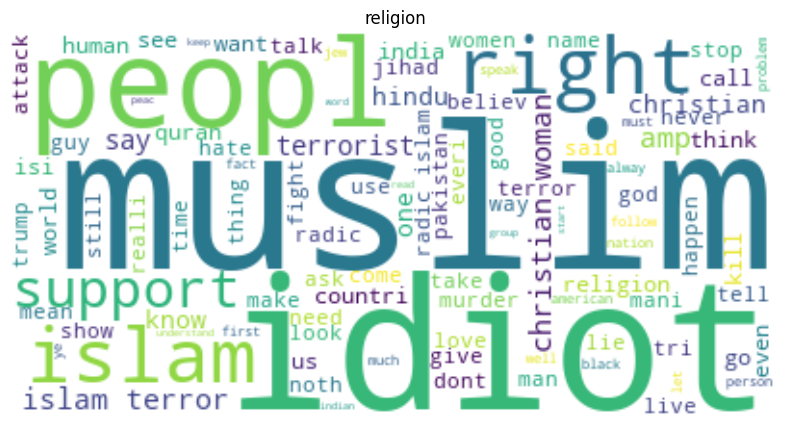

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



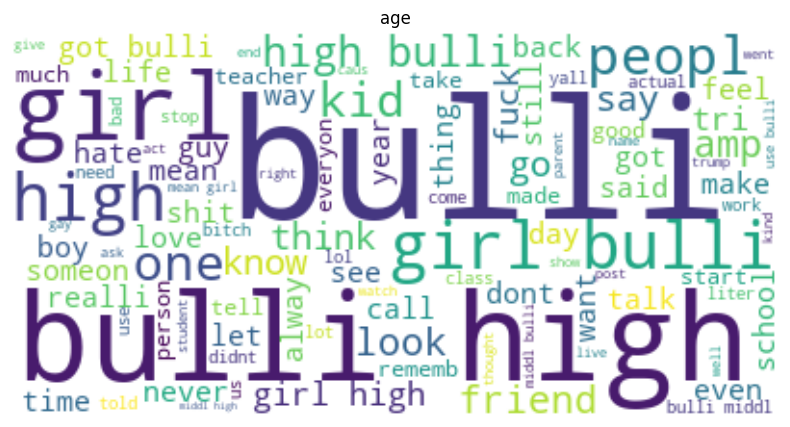

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



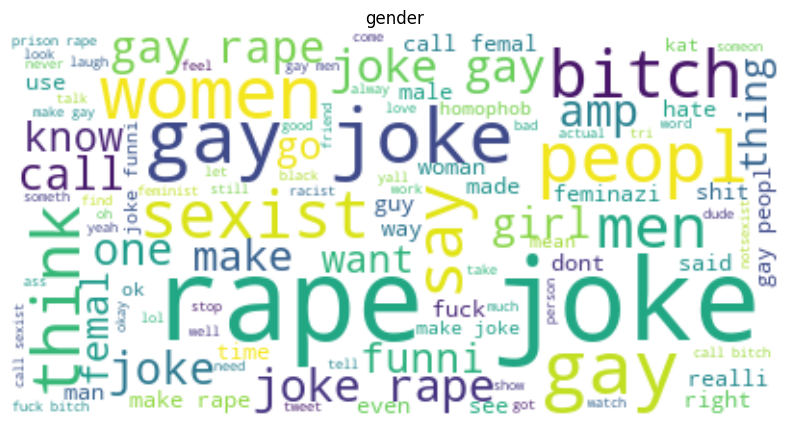

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



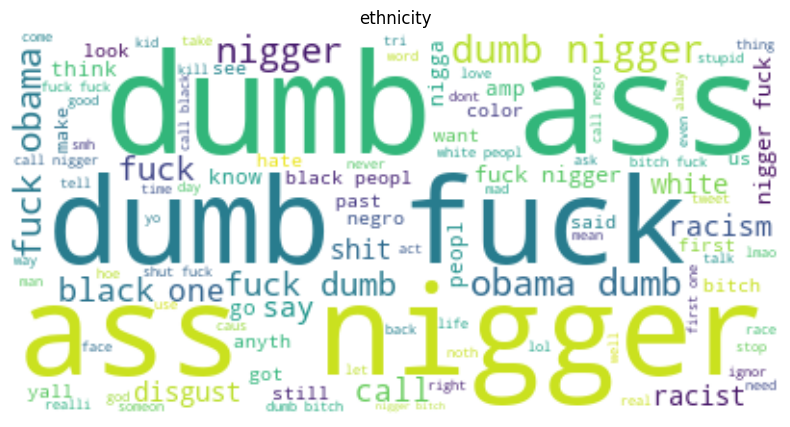

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



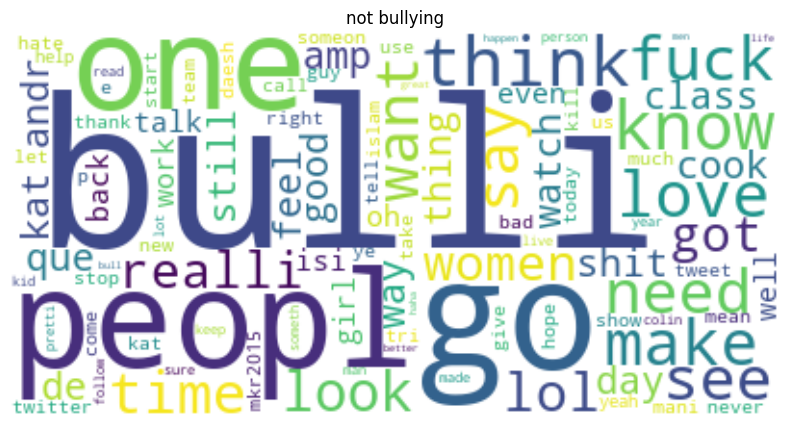

In [72]:
#Graficar las 10 palabras mas usadas en los tweets de cada categoria
def word_cloud(data, title):
    wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

for i in range(1,6):
    data = df[df['cyberbullying_type'] == i]
    data = data['tweets_clean'].str.cat(sep=' ')
    word_cloud(data, cyberbullying_type[i-1]) 

In [159]:
#ordenar los tweets por longitud
df.sort_values(by=['text_len'], inplace=True)
df


tweet_text  cyberbullying_type   
10                  @Jord_Is_Dead http://t.co/UsQInYW5Gn                   5  \
2498   @DestrossGX @KayinNasaki @tehrebound that's a ...                   5   
1464                                @karengeier Go on...                   5   
1619                             Nooooooooooooooooo #mkr                   5   
14921                                         #yesallmen                   3   
...                                                  ...                 ...   
10922  don't make rape jokes!!! don't make gay jokes!...                   3   
1317   @EurekAlertAAAS: Researchers push to import to...                   5   
33724  ... I don't feel guilty for killing him, I jus...                   2   
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...                   4   
44035  You so black and white trying to live like a n...                   4   

                                            tweets_clean  text_len  
10                                                               0  
2498                                                hoax         1  
1464                                                  go         1  
1619                                  nooooooooooooooooo         1  
14921                                          yesallmen         1  
...                                                  ...       ...  
10922  make rape joke make gay joke oh fat joke okay ...       120  
1317   research push import top antibulli program us ...       137  
33724  feel guilti kill feel guilti enjoy torment sin...       140  
45165  fuck obama dumb ass nigger bitch ltthi whore s...       158  
44035  black white tri live like nigger pahahahaha co...       180  

[38730 rows x 4 columns]

In [160]:
#Contar cuantos tweets tienen mas de 50 palabras
len(df[df['text_len'] > 50])

11

In [161]:
#Contar cuantos tweets tienen menos de 4 palabras
len(df[df['text_len'] < 4])

1927

In [76]:
df.shape

(38725, 4)

In [162]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]



In [163]:
df.shape

(36795, 4)

In [94]:
df


tweet_text  cyberbullying_type   
4440               @LarryWest42 mostly joan jett lyrics.                   5  \
14047  Kat, your cooking appears to be as unpleasant ...                   3   
4219    @MrRedMartian that avi, i thought it was two men                   5   
12987                           Gay slurs and rape jokes                   3   
46077                 Fuck you man,fuck you, dumb nigger                   4   
...                                                  ...                 ...   
21241  And yet God was able to meet their needs using...                   1   
41749  @seijohgorl hoy mami keito AAAA okay so um ika...                   4   
4846   @andrea_gcav: @viviaanajim recuerdas como noso...                   5   
44294  @JasmineLovvee If He Dont Want You Well Fuck H...                   4   
3030   He embellished the afternoon with moustachioed...                   5   

                                            tweets_clean  text_len  
4440                              mostli joan jett lyric         4  
14047                            kat cook appear unpleas         4  
4219                                 avi thought two men         4  
12987                                 gay slur rape joke         4  
46077                           fuck manfuck dumb nigger         4  
...                                                  ...       ...  
21241  yet god abl meet need use radic everyday gener...        42  
41749  hoy mami keito aaaa okay um ikaw talaga one fi...        42  
4846   recuerda como nosotra tambin eramo victima del...        72  
44294  dont want well fuck aint worth tear never swea...        73  
3030   embellish afternoon moustachio feint amp flick...        95  

[36690 rows x 4 columns]

In [165]:
for bully in df['cyberbullying_type'].unique():
    top_50_words=df.tweets_clean[df['cyberbullying_type']==bully].str.split(expand=True).stack().value_counts()[:21]
top_50_words


bulli     8853
school    8380
high      4850
girl      4611
like      2074
get       1051
one       1043
peopl      932
got        840
kid        808
would      762
middl      712
friend     631
year       587
go         553
look       543
amp        527
know       511
think      467
say        465
time       461
Name: count, dtype: int64

In [166]:
import plotly.express as px
from collections import Counter

top_words = {}
for cyberbullying_type in df['cyberbullying_type'].unique():
    subset = df[df['cyberbullying_type'] == cyberbullying_type]
    text = ' '.join(subset['tweets_clean'])
    tokens = text.split()
    word_counts = Counter(tokens)
    top_words[cyberbullying_type] = dict(word_counts.most_common(20))

# Crear gráficos separados para las 20 palabras más usadas en cada categoría
for cyberbullying_type, words in top_words.items():
    words_df = pd.DataFrame({'Word': list(words.keys()), 'Frequency': list(words.values())})
    fig = px.bar(words_df, x='Word', y='Frequency', 
                 title=f'20 palabras más usadas en {cyberbullying_names[cyberbullying_type]}', 
                 color = 'Word', color_discrete_sequence=px.colors.qualitative.Pastel, height=600, width=800)
    fig.show()


Modelos

In [167]:
tfidf = TfidfTransformer()
clf = CountVectorizer()

In [168]:
X_cv  = clf.fit_transform(df['tweets_clean'])
y = df['cyberbullying_type']

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [169]:
X_tf

<36795x35286 sparse matrix of type '<class 'numpy.float64'>'
	with 497913 stored elements in Compressed Sparse Row format>

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.3, stratify=df['cyberbullying_type'], random_state=0)

In [171]:
y_train.value_counts()

cyberbullying_type
1    5528
2    5477
4    5379
3    5038
5    4334
Name: count, dtype: int64

Aplicar SMOTE para quitar el desequilibrio en los datos

In [172]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[1] != vc[5]) or (vc[1] !=  vc[4]) or (vc[1] !=  vc[3]) or (vc[1] !=  vc[2]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

cyberbullying_type
2    5528
5    5528
3    5528
4    5528
1    5528
Name: count, dtype: int64

### Aplicar modelos

In [173]:
#Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
nb_pred = model_nb.predict(X_test)
print("classification_report")
print("Naive Bayes")
print(classification_report(y_test, nb_pred))

classification_report
Naive Bayes
              precision    recall  f1-score   support

           1       0.84      0.97      0.90      2370
           2       0.77      0.98      0.86      2347
           3       0.88      0.85      0.86      2159
           4       0.90      0.89      0.90      2306
           5       0.83      0.45      0.58      1857

    accuracy                           0.84     11039
   macro avg       0.85      0.83      0.82     11039
weighted avg       0.85      0.84      0.83     11039



In [174]:
#Support Vector Machine
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
svm_pred = model_svm.predict(X_test)
print("classification_report")
print("Support Vector Machine")
print(classification_report(y_test, svm_pred))

classification_report
Support Vector Machine
              precision    recall  f1-score   support

           1       0.95      0.95      0.95      2370
           2       0.96      0.97      0.97      2347
           3       0.93      0.87      0.90      2159
           4       0.98      0.97      0.97      2306
           5       0.77      0.83      0.80      1857

    accuracy                           0.92     11039
   macro avg       0.92      0.92      0.92     11039
weighted avg       0.93      0.92      0.92     11039



In [175]:
#K Nearest Neighbor
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
knn_pred = model_knn.predict(X_test)
print("classification_report")
print("K Nearest Neighbor")
print(classification_report(y_test, knn_pred))

classification_report
K Nearest Neighbor
              precision    recall  f1-score   support

           1       0.86      0.41      0.56      2370
           2       0.86      0.62      0.72      2347
           3       0.75      0.77      0.76      2159
           4       0.93      0.78      0.85      2306
           5       0.36      0.78      0.49      1857

    accuracy                           0.67     11039
   macro avg       0.75      0.67      0.68     11039
weighted avg       0.77      0.67      0.68     11039



In [178]:
#Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)
print("classification_report")
print("Random Forest")
print(classification_report(y_test, rf_pred))

classification_report
Random Forest
              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2370
           2       0.98      0.97      0.98      2347
           3       0.94      0.86      0.90      2159
           4       0.99      0.98      0.99      2306
           5       0.80      0.88      0.84      1857

    accuracy                           0.94     11039
   macro avg       0.93      0.93      0.93     11039
weighted avg       0.94      0.94      0.94     11039



In [179]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
gb_pred = model_gb.predict(X_test)
print("classification_report")
print("Gradient Boosting")
print(classification_report(y_test, gb_pred))

classification_report
Gradient Boosting
              precision    recall  f1-score   support

           1       0.97      0.95      0.96      2370
           2       0.99      0.96      0.98      2347
           3       0.95      0.85      0.90      2159
           4       0.99      0.97      0.98      2306
           5       0.74      0.92      0.82      1857

    accuracy                           0.93     11039
   macro avg       0.93      0.93      0.93     11039
weighted avg       0.94      0.93      0.93     11039



In [90]:
df_other['tweet_text'].iloc[2]

"RMAed my monoprice. Shoddy power bricks on those. Getting a refund and picking up another ASUS VG278HE. It's cheaper, anyways."

In [184]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense


max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['tweets_clean'])
sequences = tokenizer.texts_to_sequences(df['tweets_clean'])
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)

y = df['cyberbullying_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

y_train = y_train - 1
y_test = y_test - 1

model = Sequential()
model.add(Embedding(max_words, 64, input_length=maxlen))  # Embedding Layer
model.add(Flatten())  # Aplanar los datos para la capa densa
model.add(Dense(128, activation='relu'))  # Capa Densa
model.add(Dense(10, activation='softmax'))  # Capa de salida

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")


Epoch 1/10
644/644 [==============================] - 8s 11ms/step - loss: 0.4239 - accuracy: 0.8495 - val_loss: 0.2102 - val_accuracy: 0.9264
Epoch 2/10
644/644 [==============================] - 7s 11ms/step - loss: 0.1219 - accuracy: 0.9589 - val_loss: 0.2049 - val_accuracy: 0.9305
Epoch 3/10
644/644 [==============================] - 7s 11ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.2554 - val_accuracy: 0.9239
Epoch 4/10
644/644 [==============================] - 7s 11ms/step - loss: 0.0210 - accuracy: 0.9954 - val_loss: 0.2901 - val_accuracy: 0.9226
Epoch 5/10
644/644 [==============================] - 7s 11ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.3405 - val_accuracy: 0.9196
Epoch 6/10
644/644 [==============================] - 7s 11ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.3706 - val_accuracy: 0.9189
Epoch 7/10
644/644 [==============================] - 7s 11ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.4003 - val_accuracy: 0.9194

In [208]:
new_text = "Shooting at Santo Domingo school!!!"
preprocessed_text = preprocess(new_text)

new_text_vectorized = clf.transform([preprocessed_text])
new_text_tfidf = tf_transformer.transform(new_text_vectorized)

nb_prediction = model_nb.predict(new_text_tfidf)
svm_prediction = model_svm.predict(new_text_tfidf)
rf_prediction = model_rf.predict(new_text_tfidf)
gb_prediction = model_gb.predict(new_text_tfidf)

label_map = {1: "religion", 2: "age", 3: "gender", 4: "ethnicity", 5: "not_cyberbullying"}

def map_labels(predictions):
    return [label_map[prediction] for prediction in predictions]

nb_prediction_label = map_labels(nb_prediction)
svm_prediction_label = map_labels(svm_prediction)
rf_prediction_label = map_labels(rf_prediction)
gb_prediction_label = map_labels(gb_prediction)

cleaned_text = preprocess(new_text)
tokenized_text = tokenizer.texts_to_sequences([cleaned_text])
padded_text = pad_sequences(tokenized_text, maxlen=maxlen)

prediction = model.predict(padded_text)
predicted_class = np.argmax(prediction) + 1

print("Naive Bayes Prediction:", nb_prediction_label)
print("Support Vector Machine Prediction:", svm_prediction_label)
print("Random Forest Prediction:", rf_prediction_label)
print("Gradient Boosting Prediction:", gb_prediction_label)
print("Neural Network Prediction:", label_map[predicted_class])

1/1 [==============================] - 0s 16ms/step
Naive Bayes Prediction: ['age']
Support Vector Machine Prediction: ['age']
Random Forest Prediction: ['not_cyberbullying']
Gradient Boosting Prediction: ['not_cyberbullying']
Neural Network Prediction: not_cyberbullying


In [185]:
import gensim
import pyLDAvis 
from pyLDAvis import *
import pyLDAvis.gensim as gensimvis

# Preprocessing
tokens = [[word for word in sentence.split()] for sentence in df['tweets_clean']]
dictionary = gensim.corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

# Topic Modeling
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

c:\Users\Joako\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1429: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.029172 -0.044910       1        1  15.667548
7      0.270843 -0.006753       2        1  12.253663
5      0.049904 -0.109113       3        1  11.093576
2     -0.222684 -0.175182       4        1  10.638554
6      0.110552 -0.190876       5        1  10.519649
9     -0.101698  0.243902       6        1  10.472930
8     -0.093819  0.009834       7        1   8.222016
1      0.086429  0.048673       8        1   7.575401
0     -0.144640  0.032411       9        1   7.262186
4      0.074284  0.192013      10        1   6.294477, topic_info=          Term         Freq        Total Category  logprob  loglift
92       bulli  8835.000000  8835.000000  Default  30.0000  30.0000
82      school  8341.000000  8341.000000  Default  29.0000  29.0000
1192      joke  4943.000000  4943.000000  Default  28.0000  28.0000
5         fuck  4620.000000  4620.000000  Default  27.0000  27.0000
57        girl  5398.000000  5398.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
299        ask   316.198100   691.858693  Topic10  -4.6732   1.9825
185      still   323.282109  1364.688786  Topic10  -4.6511   1.3253
167   religion   240.969271   704.318353  Topic10  -4.9449   1.6929
202       play   226.138871   535.679418  Topic10  -5.0084   1.9031
64        like   246.238762  6359.545937  Topic10  -4.9233  -0.4859

[587 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1701      3  0.789882      1
1701     10  0.210043      1
2356      4  0.996424     10
1680      9  0.998163    100
3015      5  0.996014     12
...     ...       ...    ...
813       3  0.998356    yet
549       2  0.012685     yo
549       4  0.006343     yo
549       7  0.970412     yo
3747      3  0.997475  young

[1113 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 6, 3, 7, 10, 9, 2, 1, 5])

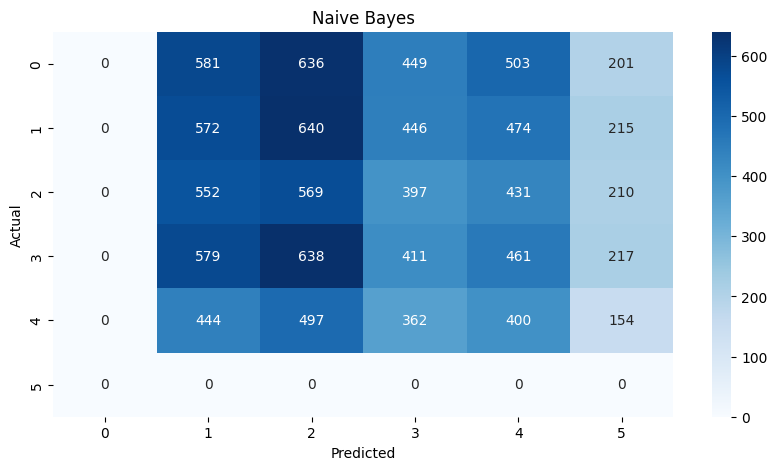

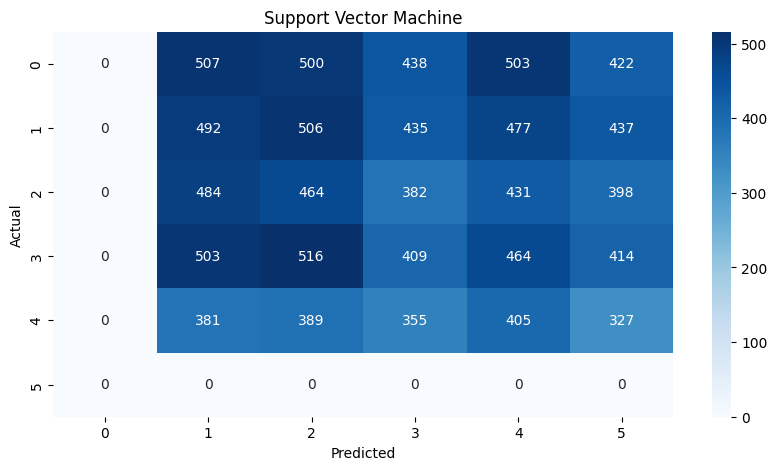

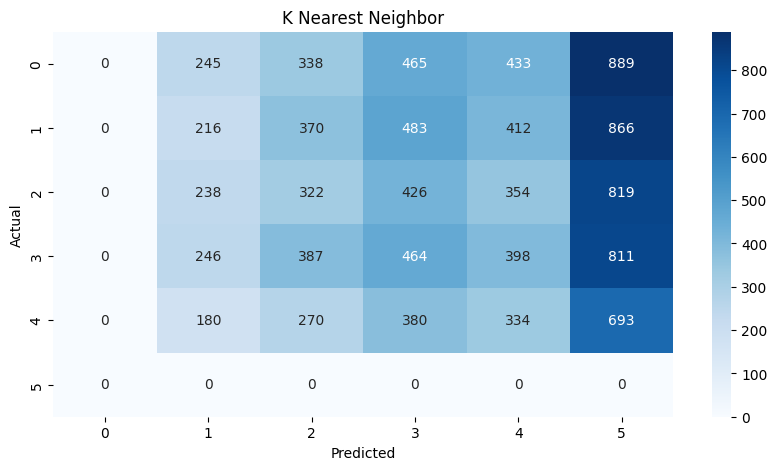

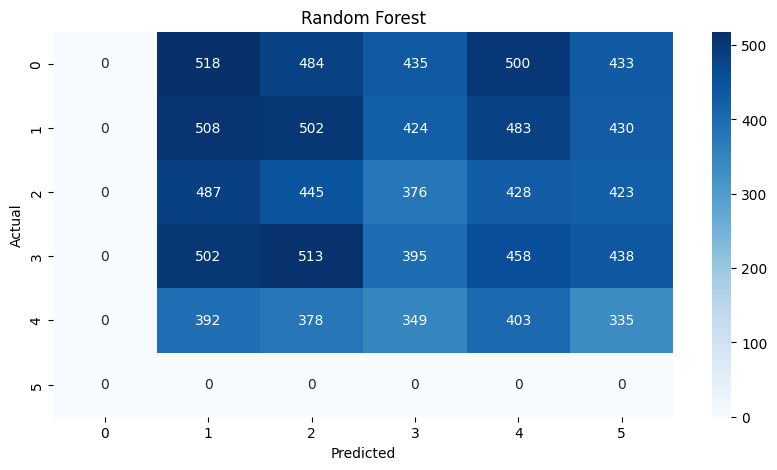

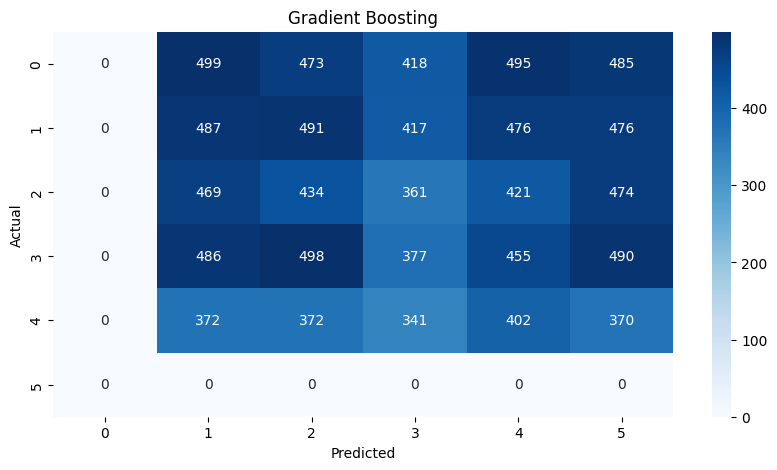

345/345 [==============================] - 0s 808us/step


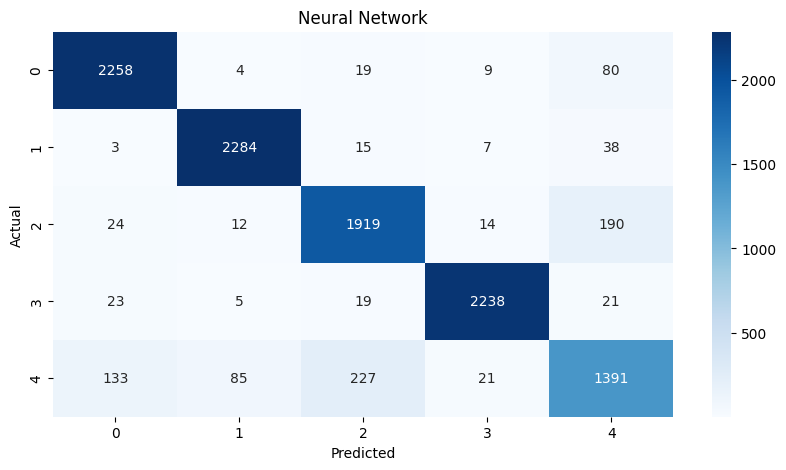

In [189]:
#Crear la matriz de confusion para cada modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

nb_cm = confusion_matrix(y_test, nb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

#Naive Bayes
plt.figure(figsize=(10,5))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes')
plt.show()

#Support Vector Machine
plt.figure(figsize=(10,5))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine')
plt.show()

#K Nearest Neighbor
plt.figure(figsize=(10,5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K Nearest Neighbor')
plt.show()

#Random Forest
plt.figure(figsize=(10,5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()

#Gradient Boosting
plt.figure(figsize=(10,5))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting')
plt.show()

#Crear la matriz de confusion para el modelo de redes neuronales
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network')
plt.show()